# Intro Lab 5 (Wood/Sandpaper)

In [142]:
# Import packages
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import math
# Tell notebook server to show plots inline
%matplotlib inline

In [143]:
mean_values, std_errors = [], []
def final_value(x):
    #calculates mean
    mean = np.mean(x)
    
    #calculates sample standard deviation (takes into account ddof=1)
    n = len(x)
    deviation_sum = 0
    for i in x:
        deviation_sum += (i - mean)**2
    sample_std = (deviation_sum / (n - 1)) ** 0.5

    #calculates standard error
    std_error = sample_std/(n**0.5)
    
    #appending to the lists
    mean_values.append(round(mean, 3))
    std_errors.append(round(std_error, 3))
    
    print(f"Mean ± Standard Error: {round(mean, 3)} ± {round(std_error, 3)}")

## Data for Sandpaper

In [144]:
masses = [74.32, 94.32, 114.32, 134.32, 154.32, 174.32] #in grams

forces_m1 = [0.53, 0.49, 0.47, 0.50, 0.52]
forces_m2 = [0.60, 0.61, 0.60, 0.63, 0.60]
forces_m3 = [0.65, 0.68, 0.65, 0.65, 0.70]
forces_m4 = [0.80, 0.80, 0.78, 0.79, 0.77]
forces_m5 = [0.97, 0.95, 0.87, 0.89, 0.90]
forces_m6 = [1.37, 1.42, 1.41, 1.38, 1.40]

final_value(forces_m1)
final_value(forces_m2)
final_value(forces_m3)
final_value(forces_m4)
final_value(forces_m5)
final_value(forces_m6)

Mean ± Standard Error: 0.502 ± 0.011
Mean ± Standard Error: 0.608 ± 0.006
Mean ± Standard Error: 0.666 ± 0.01
Mean ± Standard Error: 0.788 ± 0.006
Mean ± Standard Error: 0.916 ± 0.019
Mean ± Standard Error: 1.396 ± 0.009


In [145]:
normal_forces = [round(((x / 1000) * 9.8), 3) for x in masses] #in Newtons(N)
alpha_m = [0.1, 0.1, 0.1, 0.1, 1, 1]
normal_force_errors = [round(normal_forces[i] * np.sqrt((alpha_m[i] / masses[i])**2+(0.001)**2), 4) for i in range(len(masses))]
print(f"Normal forces: {normal_forces}")
print(f"Normal forces errors: {normal_force_errors}")

Normal forces: [0.728, 0.924, 1.12, 1.316, 1.512, 1.708]
Normal forces errors: [0.0012, 0.0013, 0.0015, 0.0016, 0.0099, 0.0099]


In [146]:
#proportional model y=mx
def model_prop(x,m):
    return m*x

#linear model y=mx+c
def model_lin(x,m,c):
    return m*x + c

# Calculating the chisq (*not reduced*)
def chisq(predicted, observed, errors):
    res = observed-predicted
    print(res, errors)
    norm_res = res / errors 
    return np.sum(norm_res**2)

def red_chisq(raw_chisq, v):
    return raw_chisq / v

In [147]:
x_dat = np.array(normal_forces)
y_dat = np.array(mean_values)
y_err = np.array(std_errors)
print(x_dat)
print(y_dat)
print(y_err)

[0.728 0.924 1.12  1.316 1.512 1.708]
[0.502 0.608 0.666 0.788 0.916 1.396]
[0.011 0.006 0.01  0.006 0.019 0.009]


In [148]:
# The order of the parameter array elements p0, lin_opt, and lin_cov
# are determined by their order [m,b] in the model definition, model_lin(x,m,b):
# we are using an unweighted fit

# Set initial parameters mInit and bInit
mInit= 0.025
cInit= -0.05

#fit the unweighted model y=mx+b
lin_opt, lin_cov = opt.curve_fit(model_lin, x_dat, y_dat, p0=[mInit,cInit])

In [149]:
# Predicted values
y_lin = model_lin(x_dat, lin_opt[0], lin_opt[1])

#error in the fit variables
lin_err = np.sqrt(np.diag(lin_cov))  

print('m = {0:6.4f} ± {1:5.4f}'.format(lin_opt[0], lin_err[0]))
print(f"c = {lin_opt[1]:.4f} ±  {lin_err[1]:.4f}")

m = 0.8041 ± 0.1690
c = -0.1667 ±  0.2135


In [150]:
# Fit the initial y=ax model to the data and display results
prop_opt, prop_cov = opt.curve_fit(model_prop, x_dat, y_dat, p0=[mInit])

# Extracting the standard errors in the fit parameters, from the covariance matrix diagonal
prop_err = np.sqrt(np.diag(prop_cov))

# Displaying   ("\u00B1" is the plus/minus symbol)
# We're using string formatting with the "%" to limit the # of digits... just look it up

print("a = %5.3f \u00b1 %5.3f" % (prop_opt[0], prop_err[0]))

a = 0.677 ± 0.043


In [151]:
#chi squared for linear case
chi2_lin = chisq(y_lin, y_dat, y_err)
print('χ2 =', chi2_lin)

#reduced chi squared for linear case
red_chi2_lin = red_chisq(chi2_lin, 4)
print('χ~2 =', red_chi2_lin)

[ 0.08333336  0.03173335 -0.06786666 -0.10346667 -0.13306667  0.18933332] [0.011 0.006 0.01  0.006 0.019 0.009]
χ2 = 920.400200342966
χ~2 = 230.1000500857415


## Plot for the proportional model

[ 0.00927115 -0.01738662 -0.09204439 -0.10270215 -0.10735992  0.23998231] [0.011 0.006 0.01  0.006 0.019 0.009]


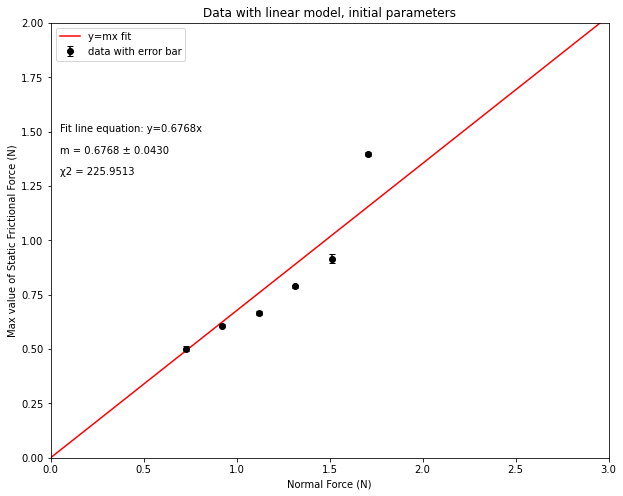

In [152]:
# Plot data with best-fit for the model y=ax
plt.figure(figsize=(10, 8))
plt.plot(np.linspace(0,10),model_prop(np.linspace(0,10), prop_opt[0]),'r-', label="y=mx fit")
plt.errorbar(x_dat, y_dat, yerr=y_err, fmt='ko', capsize = 3, capthick = 1, label="data with error bar")
plt.title('Data with linear model, initial parameters')
plt.xlabel("Normal Force (N)")
plt.ylabel("Max value of Static Frictional Force (N)")
plt.xlim(0,3)
plt.ylim(0,2)
plt.legend()

plt.text(.05,1.5, "Fit line equation: y=%5.4fx" %(prop_opt[0]))
plt.text(.05,1.4, "m = %5.4f \u00b1 %5.4f" % (prop_opt[0], prop_err[0]))
y_prop = model_prop(x_dat, prop_opt[0])
chi2_prop = chisq(y_prop, y_dat, y_err)
plt.text(.05,1.3, "χ2 = %5.4f" % (red_chisq(chi2_prop, 5)))

plt.show()

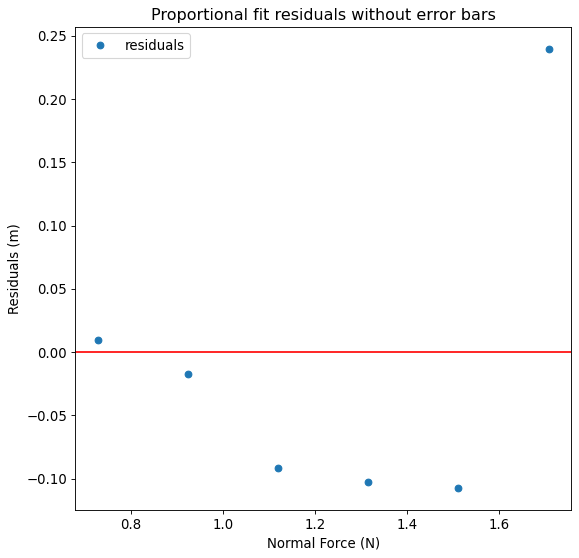

In [153]:
# Predicted y values from the fit to model y=ax
y_prop = model_prop(x_dat, prop_opt[0])

# Proportional model residuals defined
r_prop = y_dat - y_prop


# Sets figure size etc. by starting with plt.figure
fig2=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

# Residuals without error bars
plt.errorbar(x_dat, r_prop, yerr=None, fmt='o', label='residuals')
plt.axhline(color='r') # 0 line for reference

# Axes label and title
plt.title("Proportional fit residuals without error bars")
plt.xlabel("Normal Force (N)")
plt.ylabel("Residuals (m)")
plt.legend()
plt.show()

## Repeating the process for the linear model

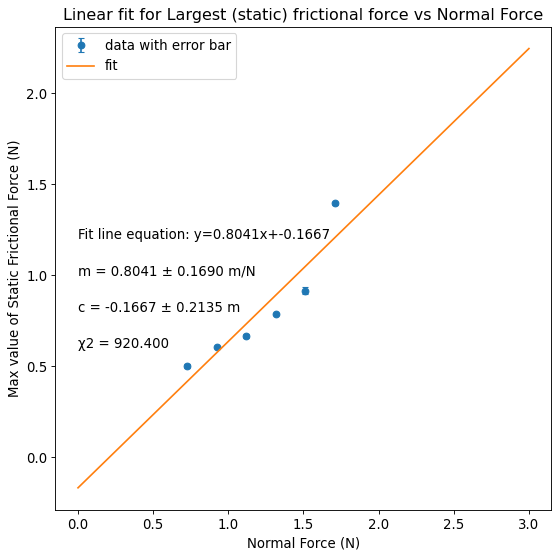

In [156]:
# Best-fit plot with error bars, parameters, chisq

# Sets figure size etc.
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

# Data with error bars
plt.errorbar(x_dat, y_dat, y_err, fmt='o', capsize = 3, capthick = 1, label="data with error bar")

# Best linear fit 
# could also use: plt.plot(np.linspace(0,10), model_lin(np.linspace(0,10), lin_opt[0], lin_opt[1]), label='fit')
plt.errorbar(np.linspace(0,3), model_lin(np.linspace(0,3), lin_opt[0], lin_opt[1]), label='fit')

# Axes label and title
plt.title("Linear fit for Largest (static) frictional force vs Normal Force")
plt.xlabel("Normal Force (N)")
plt.ylabel("Max value of Static Frictional Force (N)")

# Best fit parameters, uncertainties, and chisq
plt.text(0,1.0, "m = %5.4f \u00b1 %5.4f m/N" % (lin_opt[0], lin_err[0]))
plt.text(0,.8, "c = %5.4f \u00b1 %5.4f m" % (lin_opt[1], lin_err[1]))
plt.text(0,.6, "χ2 = %5.3f" % chi2_lin)
plt.text(0, 1.2, "Fit line equation: y=%5.4fx+%5.4f" % (lin_opt[0], lin_opt[1]))
plt.legend()
plt.show()

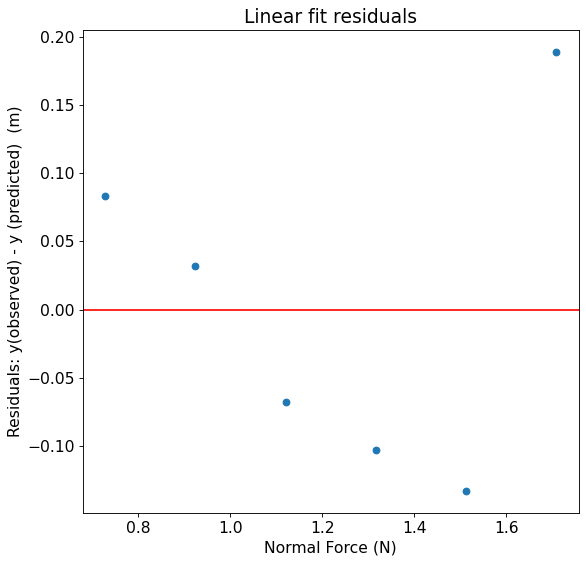

In [155]:
# Residuals plot

# Residuals
r_lin = y_dat- y_lin

# Sets figure size etc.
fig2=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '14'})

# Residuals
plt.errorbar(x_dat, r_lin, fmt='o')
plt.axhline(color='r') # 0 line for reference

# Axes label and title
plt.title("Linear fit residuals")
plt.xlabel("Normal Force (N)")
plt.ylabel("Residuals: y(observed) - y (predicted)  (m)")
plt.show()